In [28]:
from __future__ import print_function, division

import torch
import torch.utils.data as data
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, models, transforms
import torch.nn.functional as F

import numpy as np
import time
import os
import os.path
import math

import skimage.io as io
from skimage.transform import resize

import random
from random import shuffle

from PIL import Image
import matplotlib.pyplot as plt

from sympy.utilities.iterables import multiset_permutations
%matplotlib inline

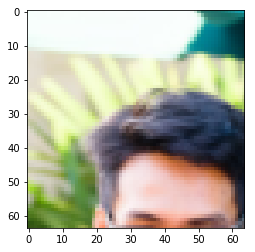

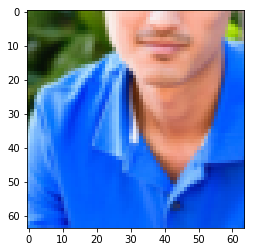

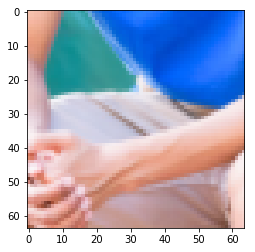

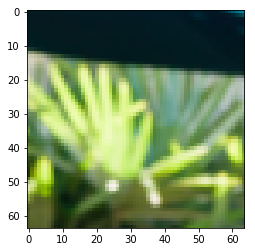

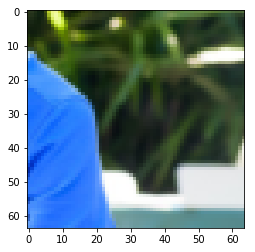

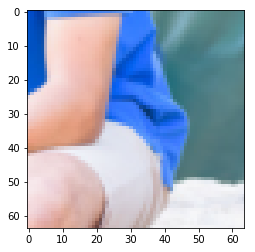

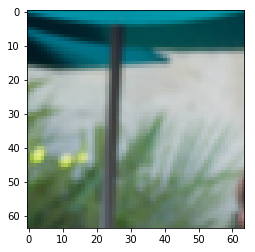

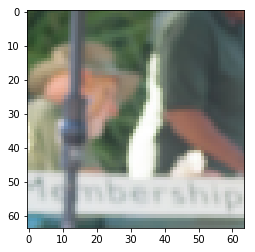

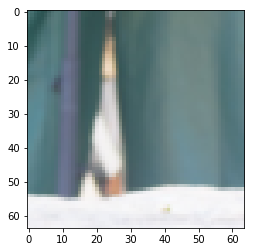

In [29]:
'''
    Testing of transformation
    Reading single image and display
'''

transform_tensor = transforms.ToTensor()

transform_pil = transforms.ToPILImage()

new_transform = transforms.Compose([ transforms.Scale(225), transforms.CenterCrop(225) ])

def createPatch(img, size): 
    patches = torch.rand(9,3,64,64) 
    count = 0 
    img = new_transform(img) 
    w, h = img.size 
    tw = 64 
    th = 64 
    for w1 in range(0, w, int(w/3)): 
        for h1 in range(0, h, int(h/3)): 
            w2 = w1 + int(np.random.uniform(1, int(w/3) - tw)) 
            h2 = h1 + int(np.random.uniform(1 , int(h/3) - th)) 
            patches[count] = transform_tensor(img.crop((w2, h2, w2 + tw, h2 + tw))) 
            count = count + 1

    return patches

img = Image.open('oyesh_public_pic.jpg')
patch = createPatch(img, 64)

for i in range(len(patch)):
    fig = plt.figure()
    plt.imshow(transform_pil(patch[i]))

['tiger']


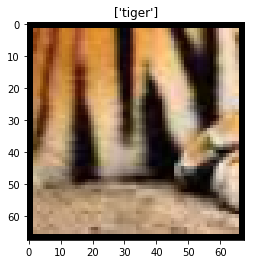

In [30]:
'''
    Testing ImageDataset class with 
    classes like 'val' or 'train'
    
    This test displays the patches
'''

data_dir = './data/'

data_transforms = {
    'train': transforms.Compose([
        transforms.Scale(225),
        transforms.RandomCrop(225),
        transforms.ToTensor(),
    ]),
    
    'val': transforms.Compose([
        transforms.Scale(225),
        transforms.RandomCrop(225),
        transforms.ToTensor(),
    ]),
}

dsets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ['train', 'val']
}

dset_loaders = {
    x: torch.utils.data.DataLoader(dsets[x], batch_size = 1, shuffle = True, num_workers=4)
    for x in ['train', 'val']
}

dset_sizes = {
    x: len(dsets[x])
    for x in ['train', 'val']
}

dset_classes = dsets['train'].classes
print(dset_classes)

use_gpu = torch.cuda.is_available()

def createPatch(img, size): 
    patches = torch.rand(9,1,3,64,64) 
    count = 0
    img = transform_pil(torch.squeeze(img)) 
    w, h = img.size 
    tw = 64 
    th = 64 
    for w1 in range(0, w, int(w/3)): 
        for h1 in range(0, h, int(h/3)): 
            w2 = w1 + int(np.random.uniform(1, int(w/3) - tw)) 
            h2 = h1 + int(np.random.uniform(1 , int(h/3) - th)) 
            patches[count] = transform_tensor(img.crop((w2, h2, w2 + tw, h2 + tw))).unsqueeze(0)
            count = count + 1

    return patches

def imshow(inp, title=None):
    inp = inp.numpy().transpose((1,2,0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    
inputs, classes = next(iter(dset_loaders['train']))

newInputs = createPatch(inputs, 64)

out = torchvision.utils.make_grid(newInputs[2])

imshow(out, title = [dset_classes[x] for x in classes])